##Bharat Intern

###TASK-1

#####Take Stock Price of Any Company you want and predict its pricing using LSTM.

* Here i have taken the Stock price dataset of Nifty50 index data.

* Importing Libraries




In [1]:
import numpy as np
import pandas as pd
import numpy
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
cd/content/gdrive/MyDrive/xyz

/content/gdrive/MyDrive/xyz


In [6]:
ls

'CarPricesData (2).pkl'       'products annual sale.csv'
 Iris.csv                      spam.csv
'k fold.csv'                  'Unemployment in India.csv'
'Nifty50_Index_data (1).csv'   Unemployment_Rate_upto_11_2020.csv
 Nifty50_Index_data.csv        winequalityN.csv


In [4]:
df=pd.read_csv("/content/gdrive/MyDrive/xyz/Nifty50_Index_data.csv")

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,pe_ratio,pb_ratio,dividend_yield
0,2006-01-02,2836.80,2849.45,2825.40,2835.95,51922369,17.16,4.37,1.56
1,2006-01-03,2835.95,2887.20,2832.05,2883.35,56919143,17.45,4.44,1.54
2,2006-01-04,2883.00,2909.35,2883.00,2904.40,82021279,17.58,4.48,1.53
3,2006-01-05,2904.45,2916.20,2884.80,2899.85,70082252,17.55,4.47,1.53
4,2006-01-06,2899.85,2921.70,2877.25,2914.00,83354445,17.64,4.49,1.52


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3509 non-null   object 
 1   Open            3509 non-null   float64
 2   High            3509 non-null   float64
 3   Low             3509 non-null   float64
 4   Close           3509 non-null   float64
 5   Volume          3509 non-null   int64  
 6   pe_ratio        3509 non-null   float64
 7   pb_ratio        3509 non-null   float64
 8   dividend_yield  3509 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 246.9+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Volume,pe_ratio,pb_ratio,dividend_yield
count,3509.000000,3509.000000,3509.000000,3509.000000,3.509000e+03,3509.000000,3509.000000,3509.000000
mean,6772.649801,6814.715560,6721.190838,6768.712653,1.994744e+08,21.463169,3.653833,1.295828
std,2592.286250,2590.252414,2586.861049,2587.438559,1.285080e+08,3.642930,0.779807,0.222682
min,2526.200000,2585.300000,2252.750000,2524.200000,2.768292e+06,10.680000,2.120000,0.820000
25%,4915.100000,4965.800000,4861.200000,4921.400000,1.261614e+08,18.640000,3.160000,1.140000
50%,5920.900000,5953.700000,5877.100000,5911.500000,1.668189e+08,21.140000,3.490000,1.270000
75%,8599.400000,8627.900000,8545.850000,8588.650000,2.305615e+08,23.730000,3.750000,1.440000
max,12430.500000,12430.500000,12321.400000,12362.300000,1.414837e+09,29.900000,6.550000,2.240000


In [10]:

df.isnull()

,Date,Open,High,Low,Close,Volume,pe_ratio,pb_ratio,dividend_yield
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3504,False,False,False,False,False,False,False,False,False
3505,False,False,False,False,False,False,False,False,False
3506,False,False,False,False,False,False,False,False,False
3507,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Volume            0
pe_ratio          0
pb_ratio          0
dividend_yield    0
dtype: int64

###EDA

Text(0, 0.5, 'Prices ($)')

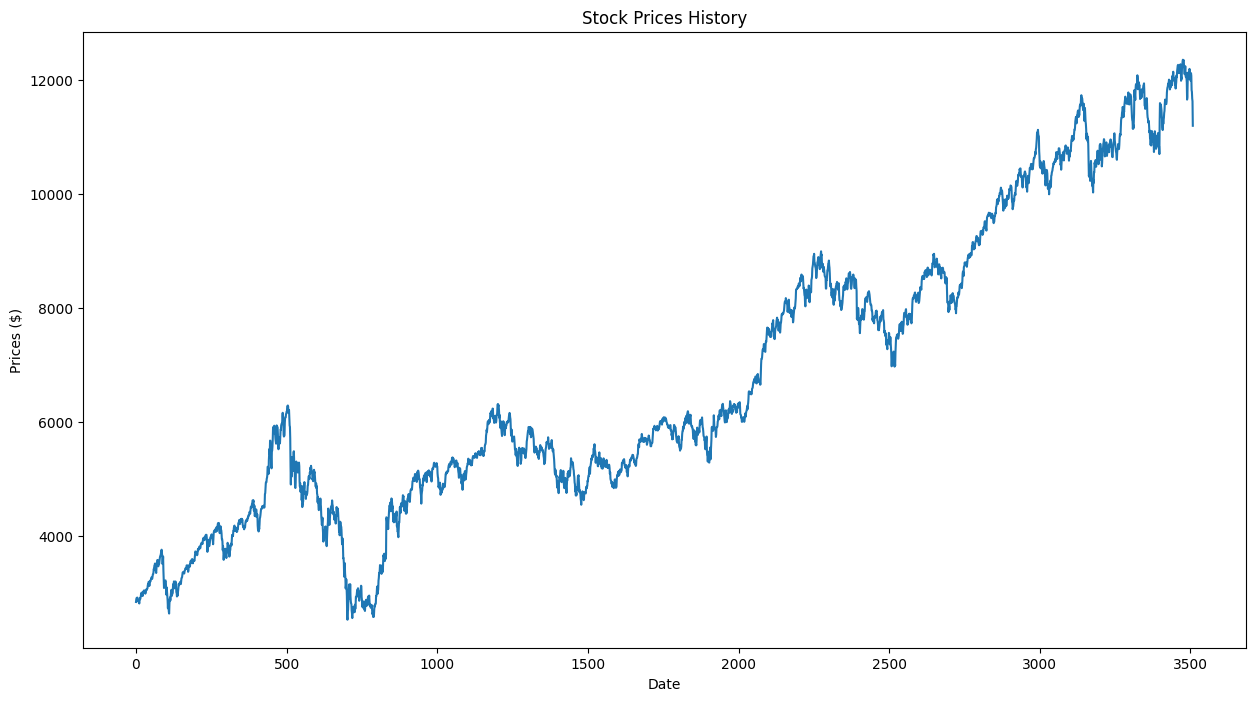

In [12]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

<ipython-input-13-35e1ba65fa30>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df.rolling(7).mean().head(15)
<ipython-input-13-35e1ba65fa30>:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df.rolling(window=30).mean()['Open'].plot()


<Axes: >

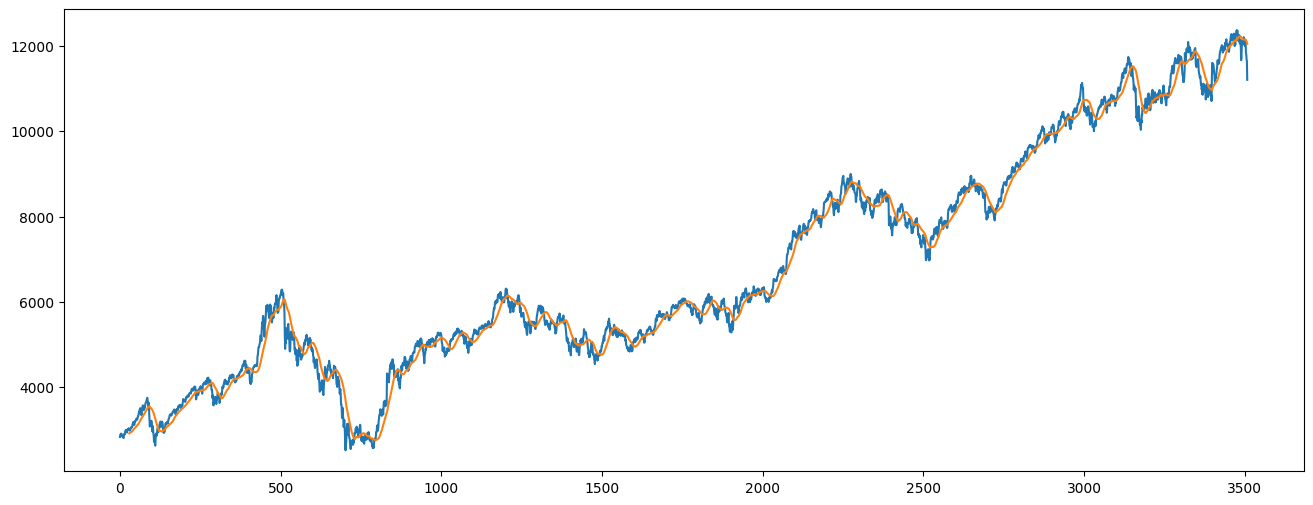

In [13]:
# Rolling mean
df.rolling(7).mean().head(15)
df['Close'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Open'].plot()


In [44]:
#Pie chart
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

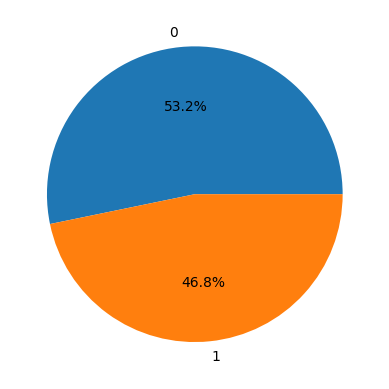

In [45]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

####Data Scaling

In [14]:
df1 = df.reset_index()['Close']

####Normalizing the Dataset.

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1) )
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.03168803],
       [0.03650603],
       [0.03864567],
       ...,
       [0.93049471],
       [0.92590033],
       [0.88203515]])

###Data Preprocessing

In [16]:

train_size = int(len(df1)*0.75)
test_size = len(df1) - train_size
train_size, test_size

(2631, 878)

In [17]:
# Modelling
train_data, test_data = df1[0:train_size: ], df1[train_size:len(df1), :1]

In [18]:

def create_dataset(dataset, time_step = 1):
    data_x, data_y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        data_x.append(a)
        data_y.append(dataset[i+time_step,0])
    return numpy.array(data_x), numpy.array(data_y)

In [19]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [20]:
x_train

array([[0.03168803, 0.03650603, 0.03864567, ..., 0.06966792, 0.07020665,
        0.06719793],
       [0.03650603, 0.03864567, 0.03818319, ..., 0.07020665, 0.06719793,
        0.05558492],
       [0.03864567, 0.03818319, 0.03962147, ..., 0.06719793, 0.05558492,
        0.04452587],
       ...,
       [0.5043606 , 0.50680518, 0.50970716, ..., 0.61990628, 0.61197284,
        0.61260813],
       [0.50680518, 0.50970716, 0.50176355, ..., 0.61197284, 0.61260813,
        0.62603043],
       [0.50970716, 0.50176355, 0.50564133, ..., 0.61260813, 0.62603043,
        0.62889684]])

In [21]:
x_test

array([[0.61678068, 0.62491233, 0.62190362, ..., 0.57613259, 0.57595471,
        0.58442179],
       [0.62491233, 0.62190362, 0.62002318, ..., 0.57595471, 0.58442179,
        0.58137242],
       [0.62190362, 0.62002318, 0.62502414, ..., 0.58442179, 0.58137242,
        0.58058467],
       ...,
       [0.89811041, 0.89344487, 0.87929072, ..., 0.97597097, 0.97139183,
        0.94583304],
       [0.89344487, 0.87929072, 0.87437615, ..., 0.97139183, 0.94583304,
        0.9426312 ],
       [0.87929072, 0.87437615, 0.89337372, ..., 0.94583304, 0.9426312 ,
        0.93049471]])

In [22]:

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

####Stacked LSTM Model

In [23]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

from keras.layers import Dropout,  Bidirectional

In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


####Fitting the Model.

In [26]:
model.fit(x_train, y_train, epochs=50,validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
80/80 [==============================] - 17s 151ms/step - loss: 0.0056 - val_loss: 5.6082e-04
Epoch 2/50
80/80 [==============================] - 11s 131ms/step - loss: 4.9576e-04 - val_loss: 0.0013
Epoch 3/50
80/80 [==============================] - 10s 131ms/step - loss: 4.6842e-04 - val_loss: 6.4882e-04
Epoch 4/50
80/80 [==============================] - 11s 132ms/step - loss: 4.4991e-04 - val_loss: 4.6968e-04
Epoch 5/50
80/80 [==============================] - 10s 127ms/step - loss: 4.5254e-04 - val_loss: 0.0014
Epoch 6/50
80/80 [==============================] - 10s 126ms/step - loss: 3.8972e-04 - val_loss: 7.2907e-04
Epoch 7/50
80/80 [==============================] - 10s 129ms/step - loss: 4.5094e-04 - val_loss: 0.0014
Epoch 8/50
80/80 [==============================] - 11s 134ms/step - loss: 3.6601e-04 - val_loss: 0.0020
Epoch 9/50
80/80 [==============================] - 10s 130ms/step - loss: 3.4154e-04 - val_loss: 0.0025
Epoch 10/50
80/80 [========================

####Prediction

In [27]:
test_predict = model.predict(x_test)
train_predict = model.predict(x_train)


80/80 [==============================] - 2s 30ms/step


In [28]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [29]:
back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[back:len(train_predict)+back, :] = train_predict

In [30]:
# Test predictions
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(back*2)+1:len(df1)-1, :] = test_predict

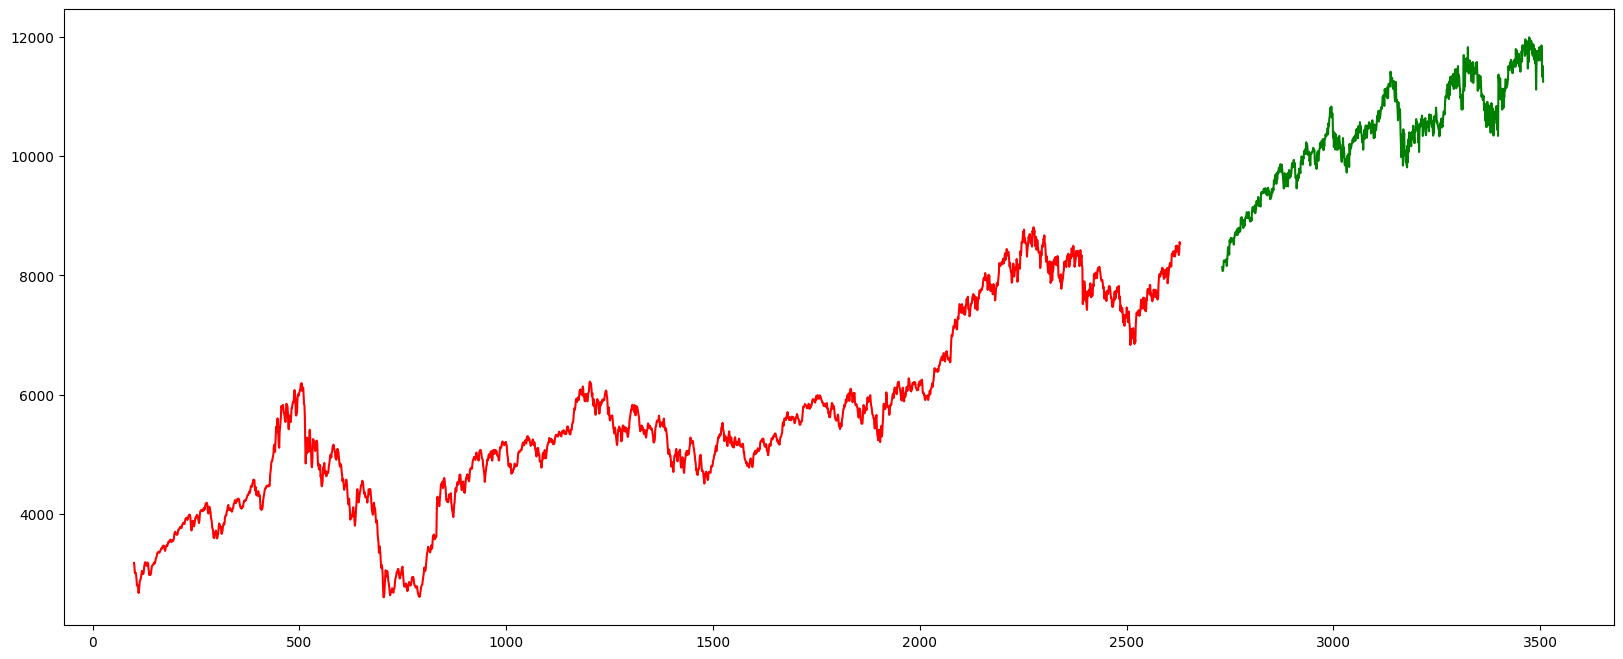

In [32]:
plt.subplots(figsize=(20,8))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

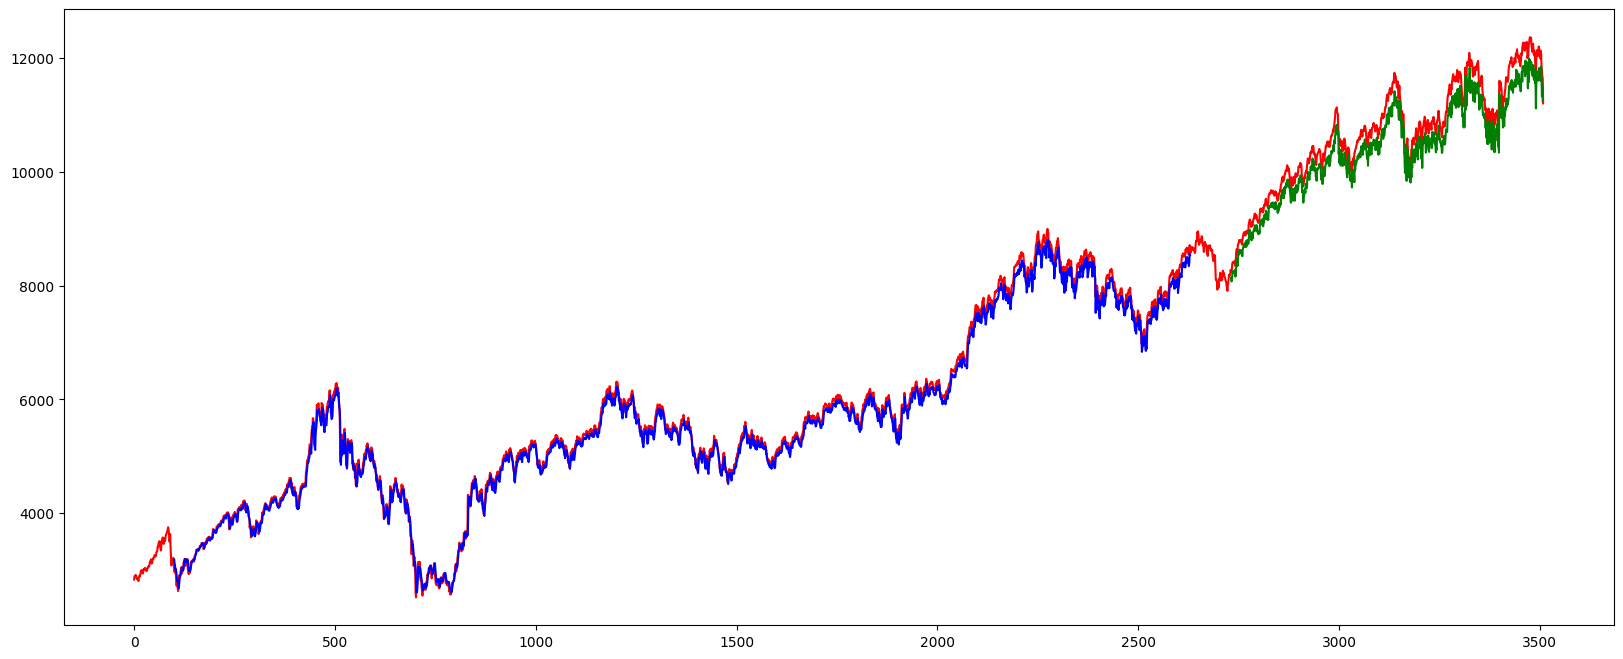

In [33]:

# Baseline and predictions
plt.subplots(figsize=(20,8))
plt.plot(scaler.inverse_transform(df1), color = 'red')
plt.plot(trainPredictPlot, color = 'blue')
plt.plot(testPredictPlot, color = 'green')
plt.show()

###Confusion matrix

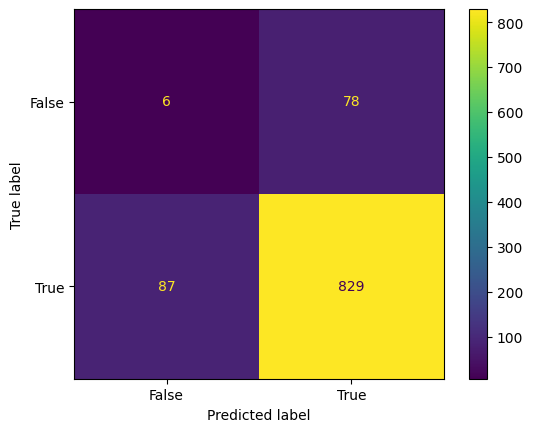

In [77]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()